In [0]:
import os
import zipfile

path = '/content/drive/My Drive/NoFilterModeDataSet.zip'
local_path = '/content/NoFilterModeDataSet'
zip_ref = zipfile.ZipFile(path,'r')
zip_ref.extractall('/content')
zip_ref.close()
# os.rename('/content/data','/content/Gesture_Recognition_Dataset')

In [0]:
import cv2
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import Callback
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [0]:
image_files = os.listdir(local_path)
images = []
target = []
for f in image_files:
  file_path = os.path.join(local_path,f)
  # image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2GRAY)
  # image = np.reshape(image,(200,200,1))
  # print(image)
  # cv2_imshow(image)
  # print(image.shape)
  # break
  images.append(cv2.imread(file_path))
  ind = re.search(r"\d",f).start()
  t = f[:ind]
  target.append(t)
  # print(t)

In [0]:
# run this to take load data for all 50 classes
target_labels = sorted(list(set(target)))
target = [target_labels.index(i) for i in target]
images = np.array(images)
target = np.array(target)

In [0]:
# run this to load data from first 10 classes
n_images = []
n_targets = []
target_labels = sorted(list(set(target)))
n_t = target_labels[:10]
for i in range(len(images)):
  if target[i] not in n_t:
    continue
  n_images.append(images[i])
  n_targets.append(target[i])

target = [target_labels.index(i) for i in n_targets]
images = np.array(n_images)
target = np.array(target)

In [0]:
# input image dimensions
img_x, img_y = 200, 200
# For grayscale use 1 value and for color images use 3 (R,G,B channels)
img_channels = 3
#number of classes
# change this value depending on what code you run above
no_classes = 50
#size of convolutional filter
no_conv = 3
#size of max pooling window
no_pool = 2
no_filters = [2,4,8,16,32,64,128,256,512]
dropout_ratio = [0,0.25,0.5,0.75,1]
input_shape = (img_x, img_y,img_channels)

In [0]:
model = Sequential()

model.add(Conv2D(no_filters[4], (no_conv, no_conv), padding='valid', activation='relu', input_shape=input_shape))
model.add(Conv2D(no_filters[4], (no_conv, no_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(no_pool, no_pool)))
model.add(Dropout(dropout_ratio[1]))

model.add(Conv2D(no_filters[5], (no_conv, no_conv), padding='valid', activation='relu'))
model.add(Conv2D(no_filters[5], (no_conv, no_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(no_pool, no_pool)))
model.add(Dropout(dropout_ratio[1]))

model.add(Conv2D(no_filters[6], (no_conv, no_conv), padding='valid', activation='relu'))
model.add(Conv2D(no_filters[6], (no_conv, no_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(no_pool, no_pool)))
model.add(Dropout(dropout_ratio[1]))

model.add(Conv2D(no_filters[7], (no_conv, no_conv), padding='valid', activation='relu'))
model.add(Conv2D(no_filters[7], (no_conv, no_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(no_pool, no_pool)))
model.add(Dropout(dropout_ratio[1]))

model.add(Conv2D(no_filters[8], (no_conv, no_conv), padding='valid', activation='relu'))
model.add(Conv2D(no_filters[8], (no_conv, no_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(no_pool, no_pool)))
model.add(Dropout(dropout_ratio[1]))


model.add(Flatten())
model.add(Dense(no_filters[8], activation='relu'))
model.add(Dropout(dropout_ratio[2]))
model.add(Dense(no_classes, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 47, 47, 64)      

In [0]:
# callback which stops training when training accuracy reaches 90%
class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc = logs.get('acc')
    if acc:
      if acc > 0.9:
        self.model.stop_training = True

In [0]:
callback = MyCallback()
history = model.fit(x=images,y=target,validation_split=0.2,epochs=50,callbacks=[callback])

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 10s 3ms/sample - loss: 4.1314 - acc: 0.0192 - val_loss: 3.9137 - val_acc: 0.0110
Epoch 2/50
4000/4000 [==============================] - 10s 2ms/sample - loss: 3.9015 - acc: 0.0205 - val_loss: 3.9162 - val_acc: 0.0140
Epoch 3/50
4000/4000 [==============================] - 10s 2ms/sample - loss: 3.9112 - acc: 0.0185 - val_loss: 3.9168 - val_acc: 0.0140
Epoch 4/50
4000/4000 [==============================] - 10s 2ms/sample - loss: 3.9080 - acc: 0.0235 - val_loss: 3.9102 - val_acc: 0.0110
Epoch 5/50
4000/4000 [==============================] - 10s 2ms/sample - loss: 3.7736 - acc: 0.0420 - val_loss: 3.5879 - val_acc: 0.0620
Epoch 6/50
4000/4000 [==============================] - 10s 2ms/sample - loss: 3.3576 - acc: 0.1125 - val_loss: 4.5130 - val_acc: 0.1330
Epoch 7/50
4000/4000 [==============================] - 9s 2ms/sample - loss: 2.8755 - acc: 0.2017 - val_loss: 3.0629 - val_acc: 0

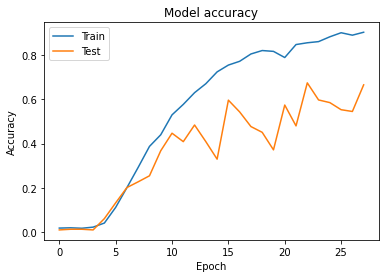

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()